In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

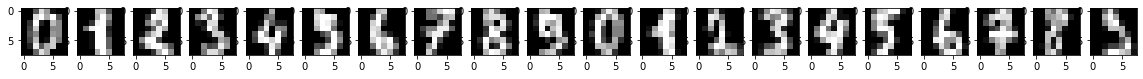

In [2]:
# rysowanie przykładow
plt.figure(figsize=(20,4))
i = 0
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    i+=1
    plt.subplot(1, 20, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [3]:
# Uruchomiemie algorytmu KMeans, ustawiamy 10 klastrów (parametr n_clusters) wynik zapisany do zmiennej kmeans_digit    
from sklearn.cluster import KMeans
kmeans_digit = KMeans(n_clusters=10)
clusters = kmeans_digit.fit_predict(digits.data)
kmeans_digit.cluster_centers_.shape

(10, 64)

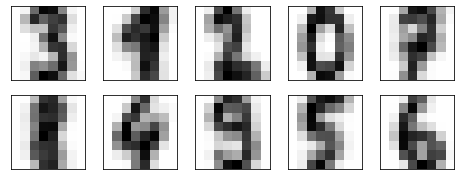

In [4]:
# poszczególne środki klas
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_digit.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    

In [5]:
# przypisanie właściwych etykiet do wynikowych klas

from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

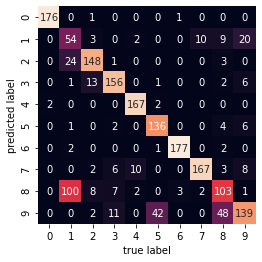

In [7]:
# dopasowaniu liczb z pisma recznego metodą k-means 
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');